In [1]:
import numpy as np
import pandas as pd
import math
import statistics as stats
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Gaussian / Normal Distribution

## f(x) = $\frac{1}{\sqrt{2\pi	\sigma^2}} e^ \frac{-(x-\mu)^2}{2\sigma^2}$

    When the normal distribution has a mean () of zero and standard deviation () of one, as it does by default with the NumPy normal() method, it is a standard normal distribution (a.k.a., standard Gaussian distribution or z-distribution).

<AxesSubplot:ylabel='Density'>

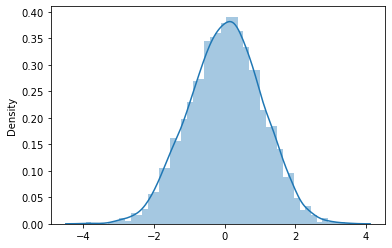

In [2]:
# create random data points of a normal distribution
normal_dist = np.random.normal(size=5000)

# plot the distribution
sns.distplot(normal_dist)

####  Uses approximate distributions in arrays to stand for Random Variables

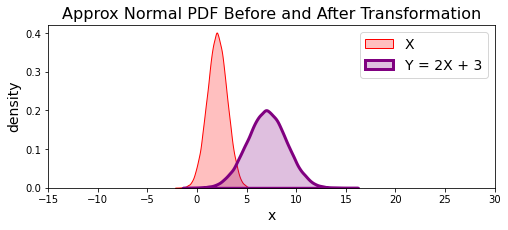

          X     Y
mean      0  7.01
variance  1  4.01


In [3]:
mean = 0
var = 1

X = np.random.normal(2, math.sqrt(var), 100000)
Y =  2*X + 3

plt.figure(figsize=(8, 3))
plt.title('Approx Normal PDF Before and After Transformation', fontsize=16)
plt.ylabel('density', fontsize=14)
plt.xlabel('x', fontsize=14)
sns.kdeplot(X, shade=True, label='X', color='red')
sns.kdeplot(Y, shade=True, label='Y = 2X + 3', lw=3, color='purple')
plt.xlim(-15, 30)
plt.legend(fontsize=14)

plt.show()

table = pd.DataFrame({'X':[mean, var], 'Y':[round(np.mean(Y), 2), round(np.var(Y), 2)]})
table.rename(index={0:'mean', 1:'variance'}, inplace=True)
print(table)

#### Normal distribution CDF Plot simulation

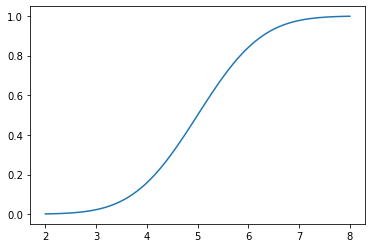

In [4]:
mu = 5
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.cdf(x, mu, sigma))
plt.show()

## The Central Limit Theorem

With large enough sample sizes, we can assume the sampling* distribution of the means will be normally distributed.

*Sampling from any distribution

In [5]:
# function for generating sampling distributions

def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
        
    return sample_means

#### Sampling from skewed distribution

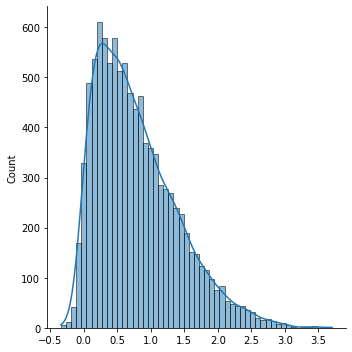

In [6]:
# create a skewed distribution as example
sk_dist = s = scipy.stats.skewnorm.rvs(10, size=10000)

# plot the distribution
sns.displot(s, kde=True)

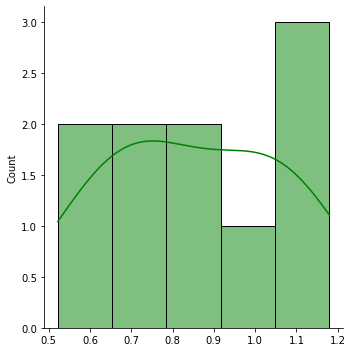

In [7]:
# plot the distribution of the sample means
sns.displot(sample_mean_calculator(sk_dist, 10, 10), color='green', kde=True)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed.

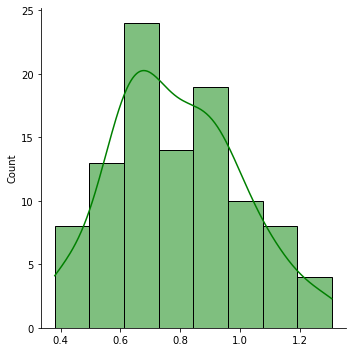

In [8]:
sns.displot(sample_mean_calculator(sk_dist, 10, 100), color='green', kde=True)

The larger the sample, the tighter the sample means will tend to be around the population mean...

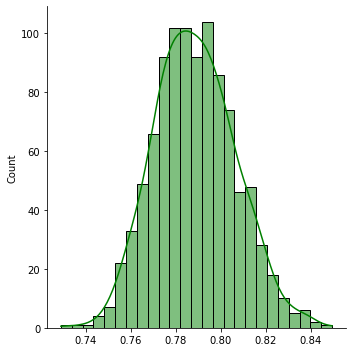

In [9]:
sns.displot(sample_mean_calculator(sk_dist, 1000, 1000), color='green', kde=True)

#### Sampling from uniform distribution

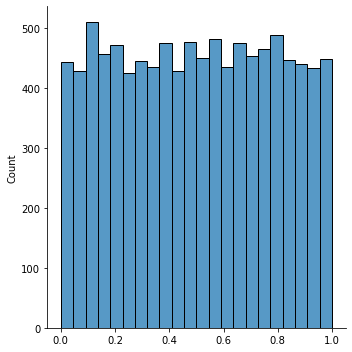

In [10]:
unif_dist = np.random.uniform(size=10000)

sns.displot(unif_dist)

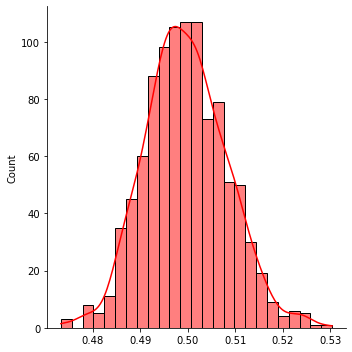

In [11]:
_ = sns.displot(sample_mean_calculator(unif_dist, 1000, 1000), color='red', kde=True)
